# Data Visualization_Temp&Precipitation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../dataset_for_analysis/data_weather_new.csv',parse_dates=['date'])

## Data preparation

In [3]:
# Extract the information of year, week and month
data['year']=data['date'].dt.year
data['month']=data['date'].dt.to_period('M')
data['week']=data['date'].dt.to_period('W')

# Calculate the annual mean_temp and precipitation
mean_temp_yearly=data.groupby('year')['mean_temp'].mean()
min_temp_yearly=data.groupby('year')['min_temp'].mean()
max_temp_yearly=data.groupby('year')['max_temp'].mean()
precipitation_yearly=data.groupby('year')['precipitation'].sum()

# Calculate the monthly mean_temp and precipitation
mean_temp_monthly=data.groupby('month')['mean_temp'].mean()
min_temp_monthly=data.groupby('month')['min_temp'].mean()
max_temp_monthly=data.groupby('month')['max_temp'].mean()
precipitation_monthly=data.groupby('month')['precipitation'].sum()

# Calculate the monthly mean temperature and precipitation in ten years
ten_years = mean_temp_monthly.index[-1].year - 10
mean_temp_monthly_ten = mean_temp_monthly[mean_temp_monthly.index.year >= ten_years]
min_temp_monthly_ten = min_temp_monthly[min_temp_monthly.index.year >= ten_years]
max_temp_monthly_ten = max_temp_monthly[max_temp_monthly.index.year >= ten_years]
precipitation_monthly_ten = precipitation_monthly[precipitation_monthly.index.year >= ten_years]

# Calculate the weekly mean_temp and precipitation
mean_temp_weekly=data.groupby('week')['mean_temp'].mean()
min_temp_weekly=data.groupby('week')['min_temp'].mean()
max_temp_weekly=data.groupby('week')['max_temp'].mean()
precipitation_weekly=data.groupby('week')['precipitation'].sum()

# Calculate the weekly mean temperature and precipitation in two years
two_years = mean_temp_weekly.index[-1].year - 2
mean_temp_weekly_two = mean_temp_weekly[mean_temp_weekly.index.year >= two_years]
min_temp_weekly_two = min_temp_weekly[min_temp_weekly.index.year >= two_years]
max_temp_weekly_two = max_temp_weekly[max_temp_weekly.index.year >= two_years]
precipitation_weekly_two = precipitation_weekly[precipitation_weekly.index.year >= two_years]

## Visualize the distribution of each variable

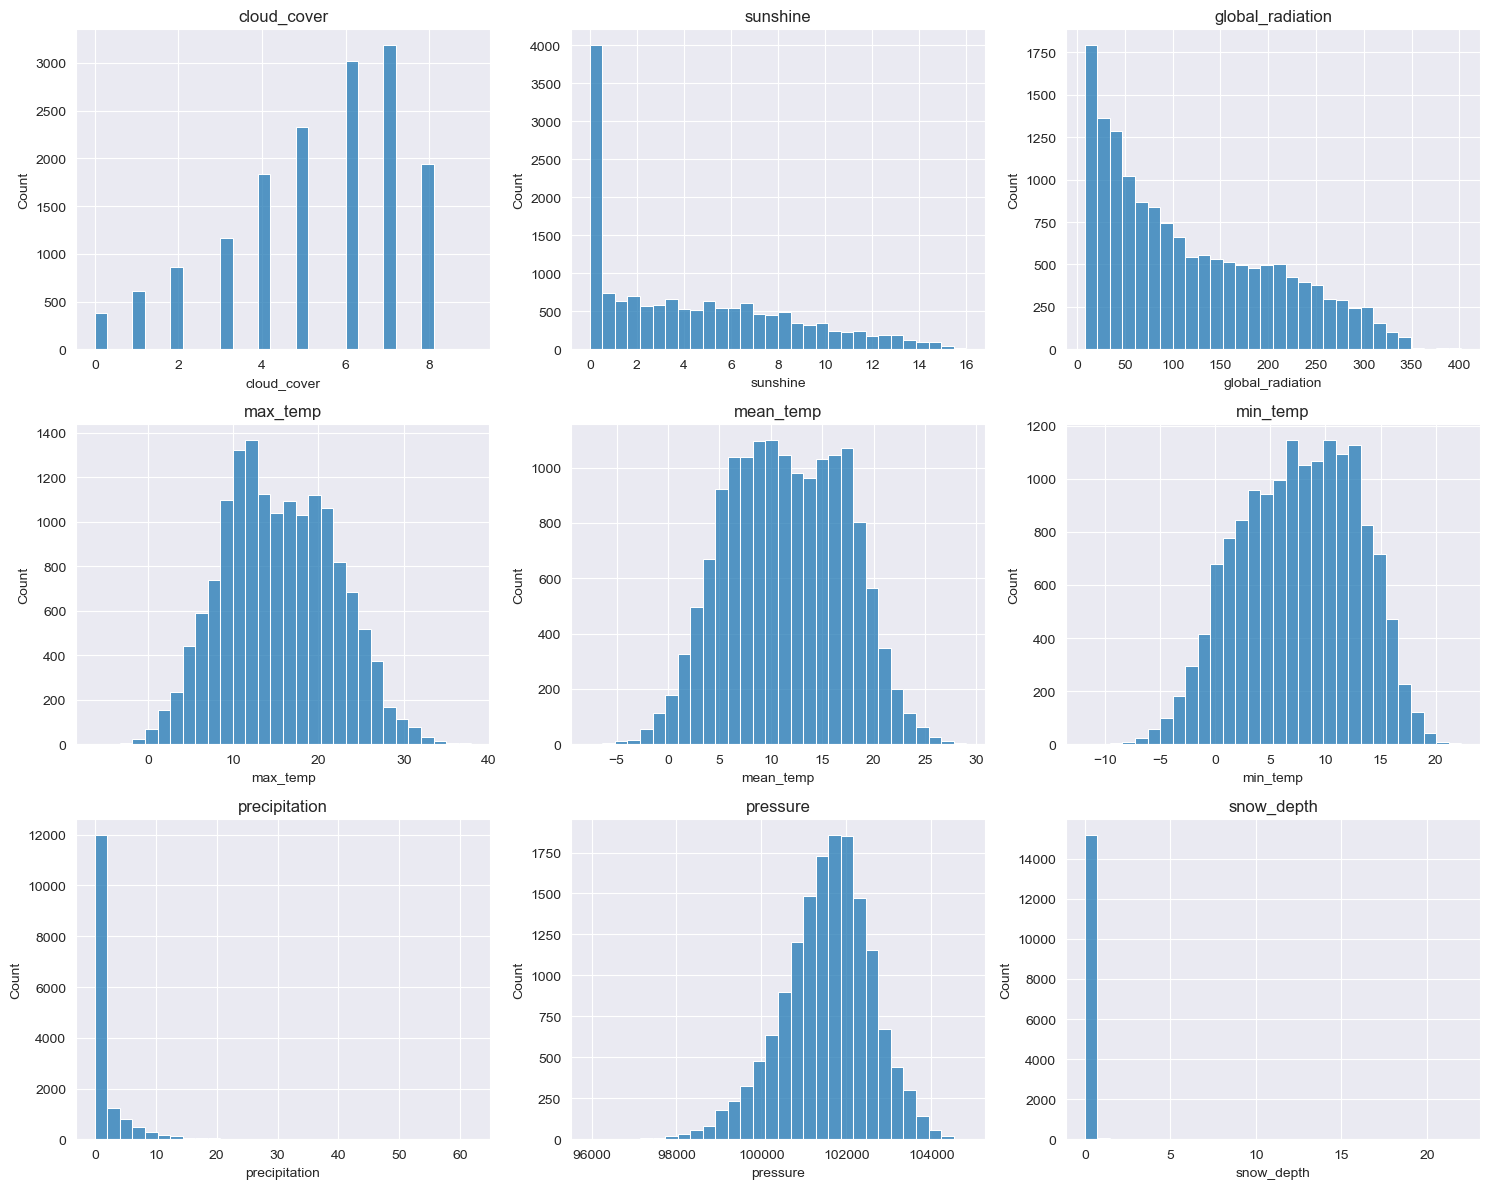

In [4]:
# Extract the variables that we need to visualize
variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
             'mean_temp', 'min_temp', 'precipitation', 'pressure',
             'snow_depth']

# Create the subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Create the hist gram for each variable
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.histplot(data[var], bins=30, kde=False, ax=axes[row, col])
    axes[row, col].set_title(var)

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


## Visualize the correlation between each variable

C:\Users\Thomas\AppData\Local\Temp\ipykernel_3916\1833680102.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.drop(columns=['year','month']).corr().round(3)


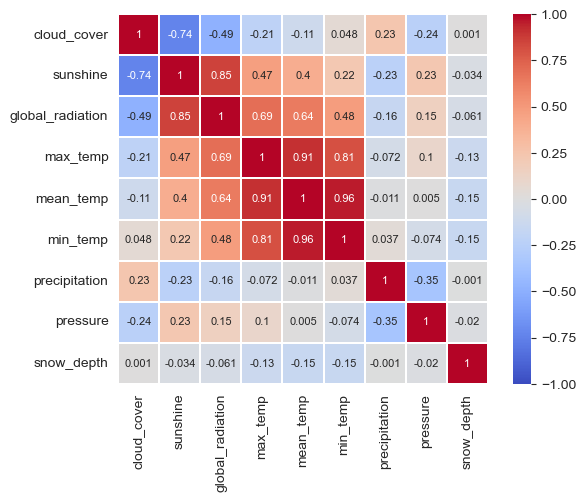

In [5]:
import seaborn as sns

correlation=data.drop(columns=['year','month']).corr().round(3)
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',
            annot=True,square=True, cmap='coolwarm',annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Data visualization by year

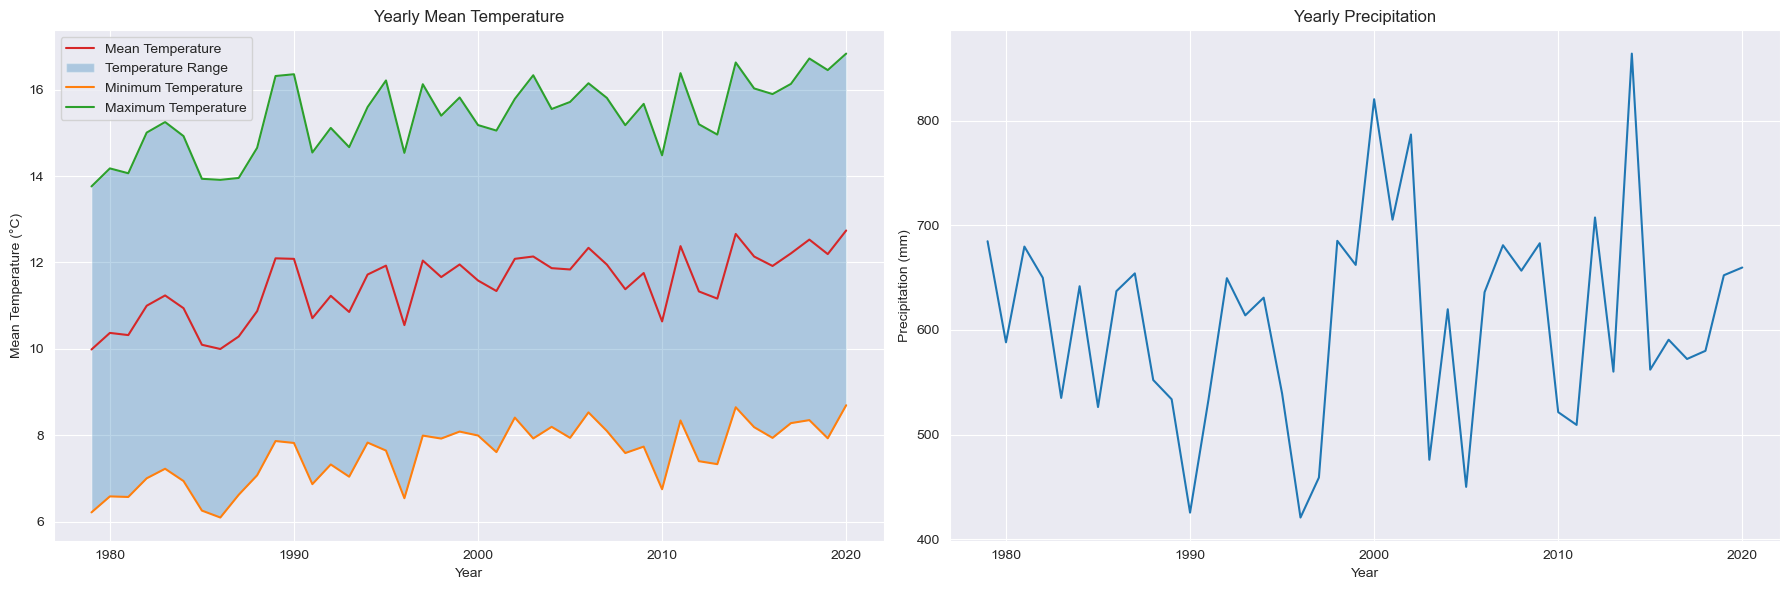

In [6]:
import matplotlib.pyplot as plt

# Create the figure containing two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# The plot for mean_temp
ax1.plot(mean_temp_yearly.index, mean_temp_yearly.values, label='Mean Temperature', color='tab:red')
ax1.fill_between(mean_temp_yearly.index, min_temp_yearly.values, max_temp_yearly.values, alpha=0.3, label='Temperature Range')
ax1.plot(min_temp_yearly.index, min_temp_yearly.values, label='Minimum Temperature', color='tab:orange')
ax1.plot(max_temp_yearly.index, max_temp_yearly.values, label='Maximum Temperature', color='tab:green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Yearly Mean Temperature')
ax1.legend(loc='upper left')

# The plot for precipitation
ax2.plot(precipitation_yearly.index, precipitation_yearly.values, label='Precipitation', color='tab:blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Yearly Precipitation')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

## Data visualization by month

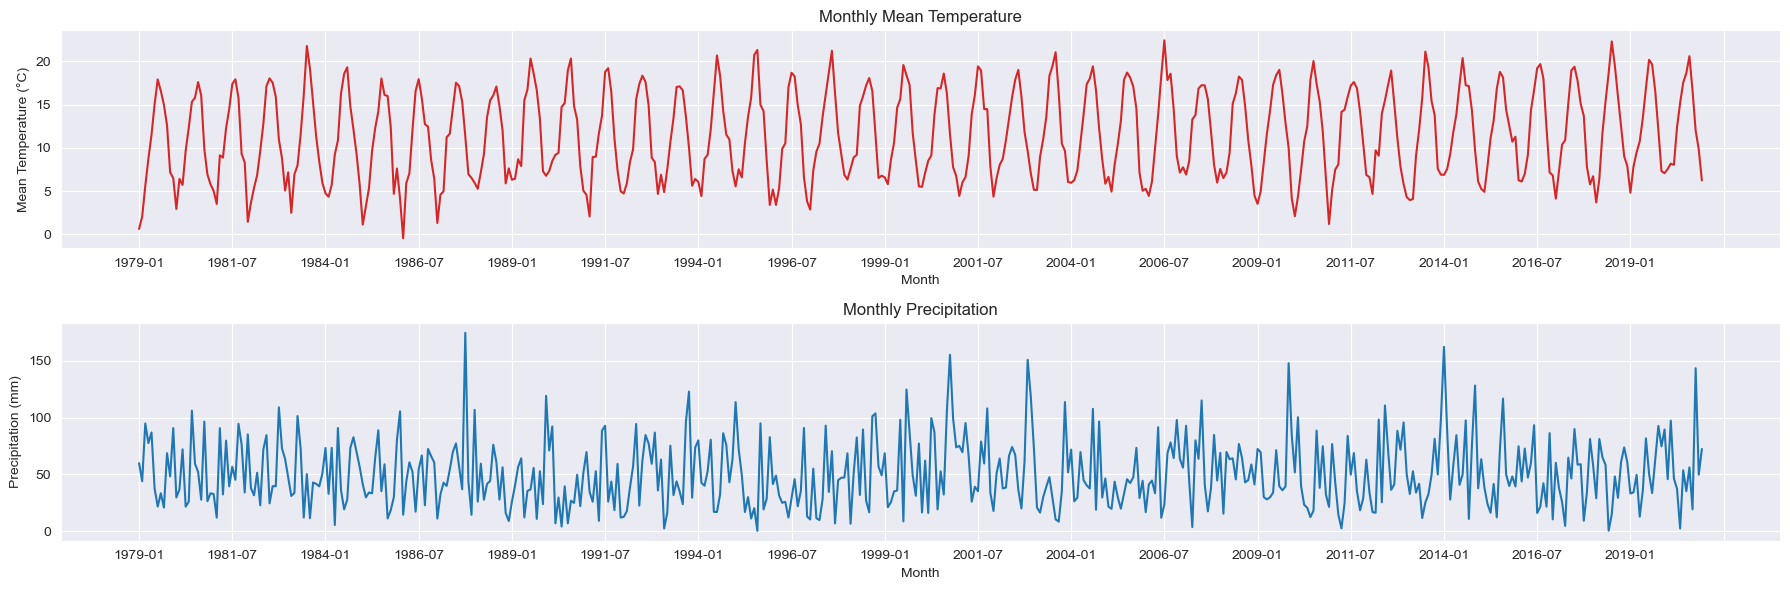

In [7]:
import matplotlib.pyplot as plt

# Create the figure containing two subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,6))

# The plot for mean_temp
ax1.plot(mean_temp_monthly.index.astype(str),mean_temp_monthly.values,label='Mean Temperature',color='tab:red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Monthly Mean Temperature')
# ax1.legend('upper left')

# The plot for precipitation
ax2.plot(precipitation_monthly.index.astype(str),precipitation_monthly.values,label='Precipitation', color='tab:blue')
ax2.set_xlabel('Month')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Monthly Precipitation')

# Adjust x-axis label spacing
ax1.tick_params(axis='x')
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.tick_params(axis='x')
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))


# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

## Data visualization by week in ten years

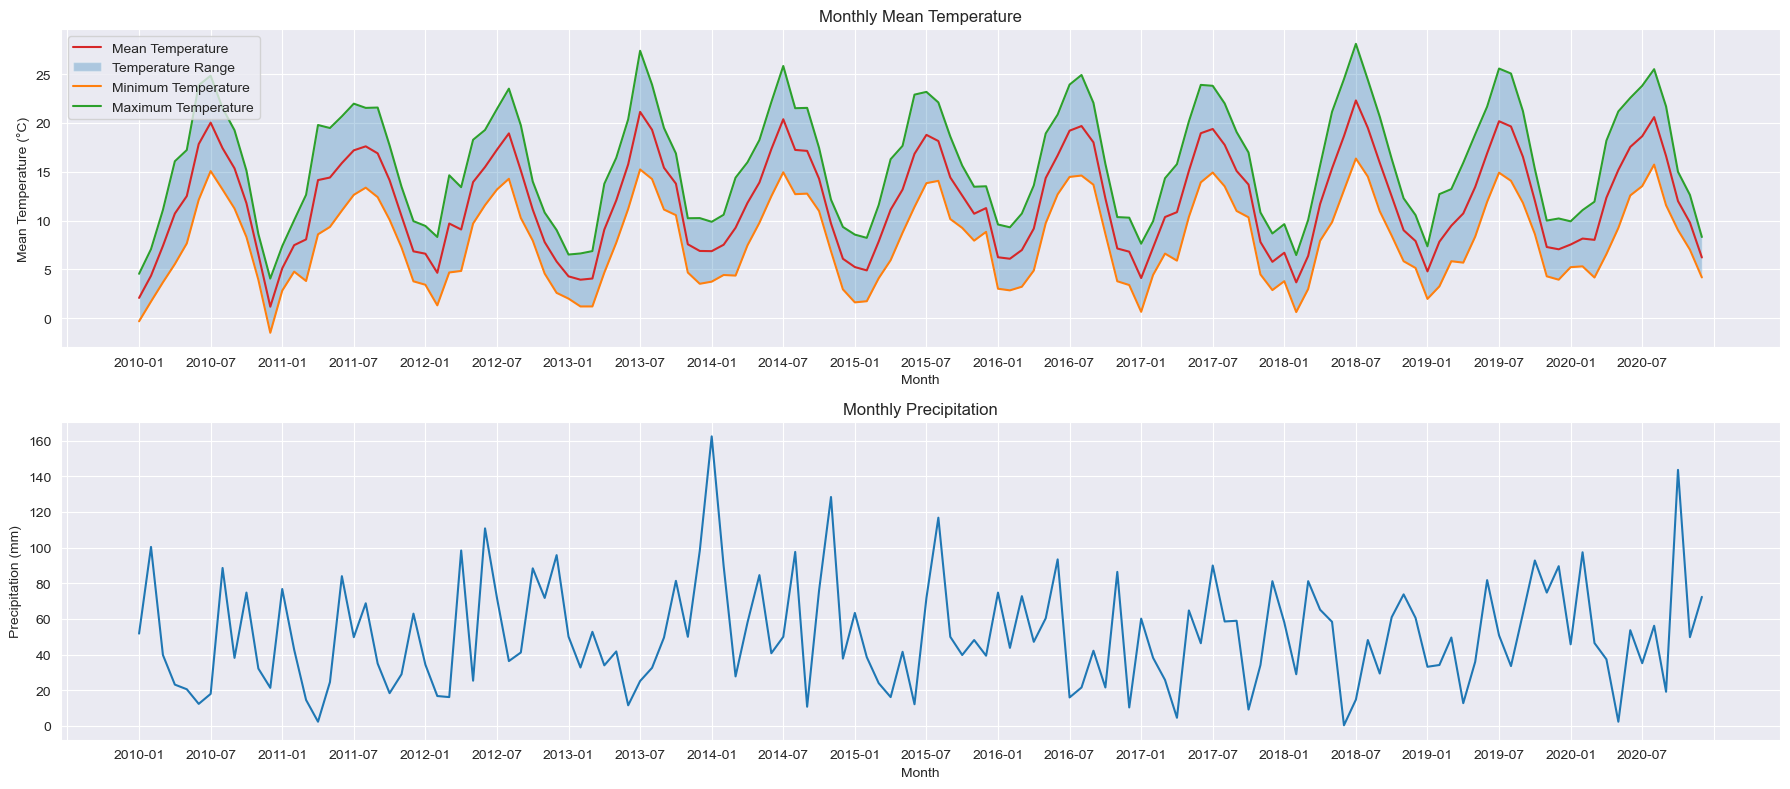

In [8]:
import matplotlib.pyplot as plt

# Create the figure containing two subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,8))

# The plot for mean_temp
ax1.plot(mean_temp_monthly_ten.index.astype(str),mean_temp_monthly_ten.values,label='Mean Temperature',color='tab:red')
ax1.fill_between(mean_temp_monthly_ten.index.astype(str), min_temp_monthly_ten.values, max_temp_monthly_ten.values, alpha=0.3, label='Temperature Range')
ax1.plot(min_temp_monthly_ten.index.astype(str), min_temp_monthly_ten.values, label='Minimum Temperature', color='tab:orange')
ax1.plot(max_temp_monthly_ten.index.astype(str), max_temp_monthly_ten.values, label='Maximum Temperature', color='tab:green')
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Monthly Mean Temperature')
ax1.legend(loc='upper left')

# The plot for precipitation
ax2.plot(precipitation_monthly_ten.index.astype(str),precipitation_monthly_ten.values,label='Precipitation', color='tab:blue')
ax2.set_xlabel('Month')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Monthly Precipitation')

# Adjust x-axis label spacing
ax1.tick_params(axis='x')
ax1.xaxis.set_major_locator(plt.MaxNLocator(28))
ax2.tick_params(axis='x')
ax2.xaxis.set_major_locator(plt.MaxNLocator(28))


# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

## Data visualization by week

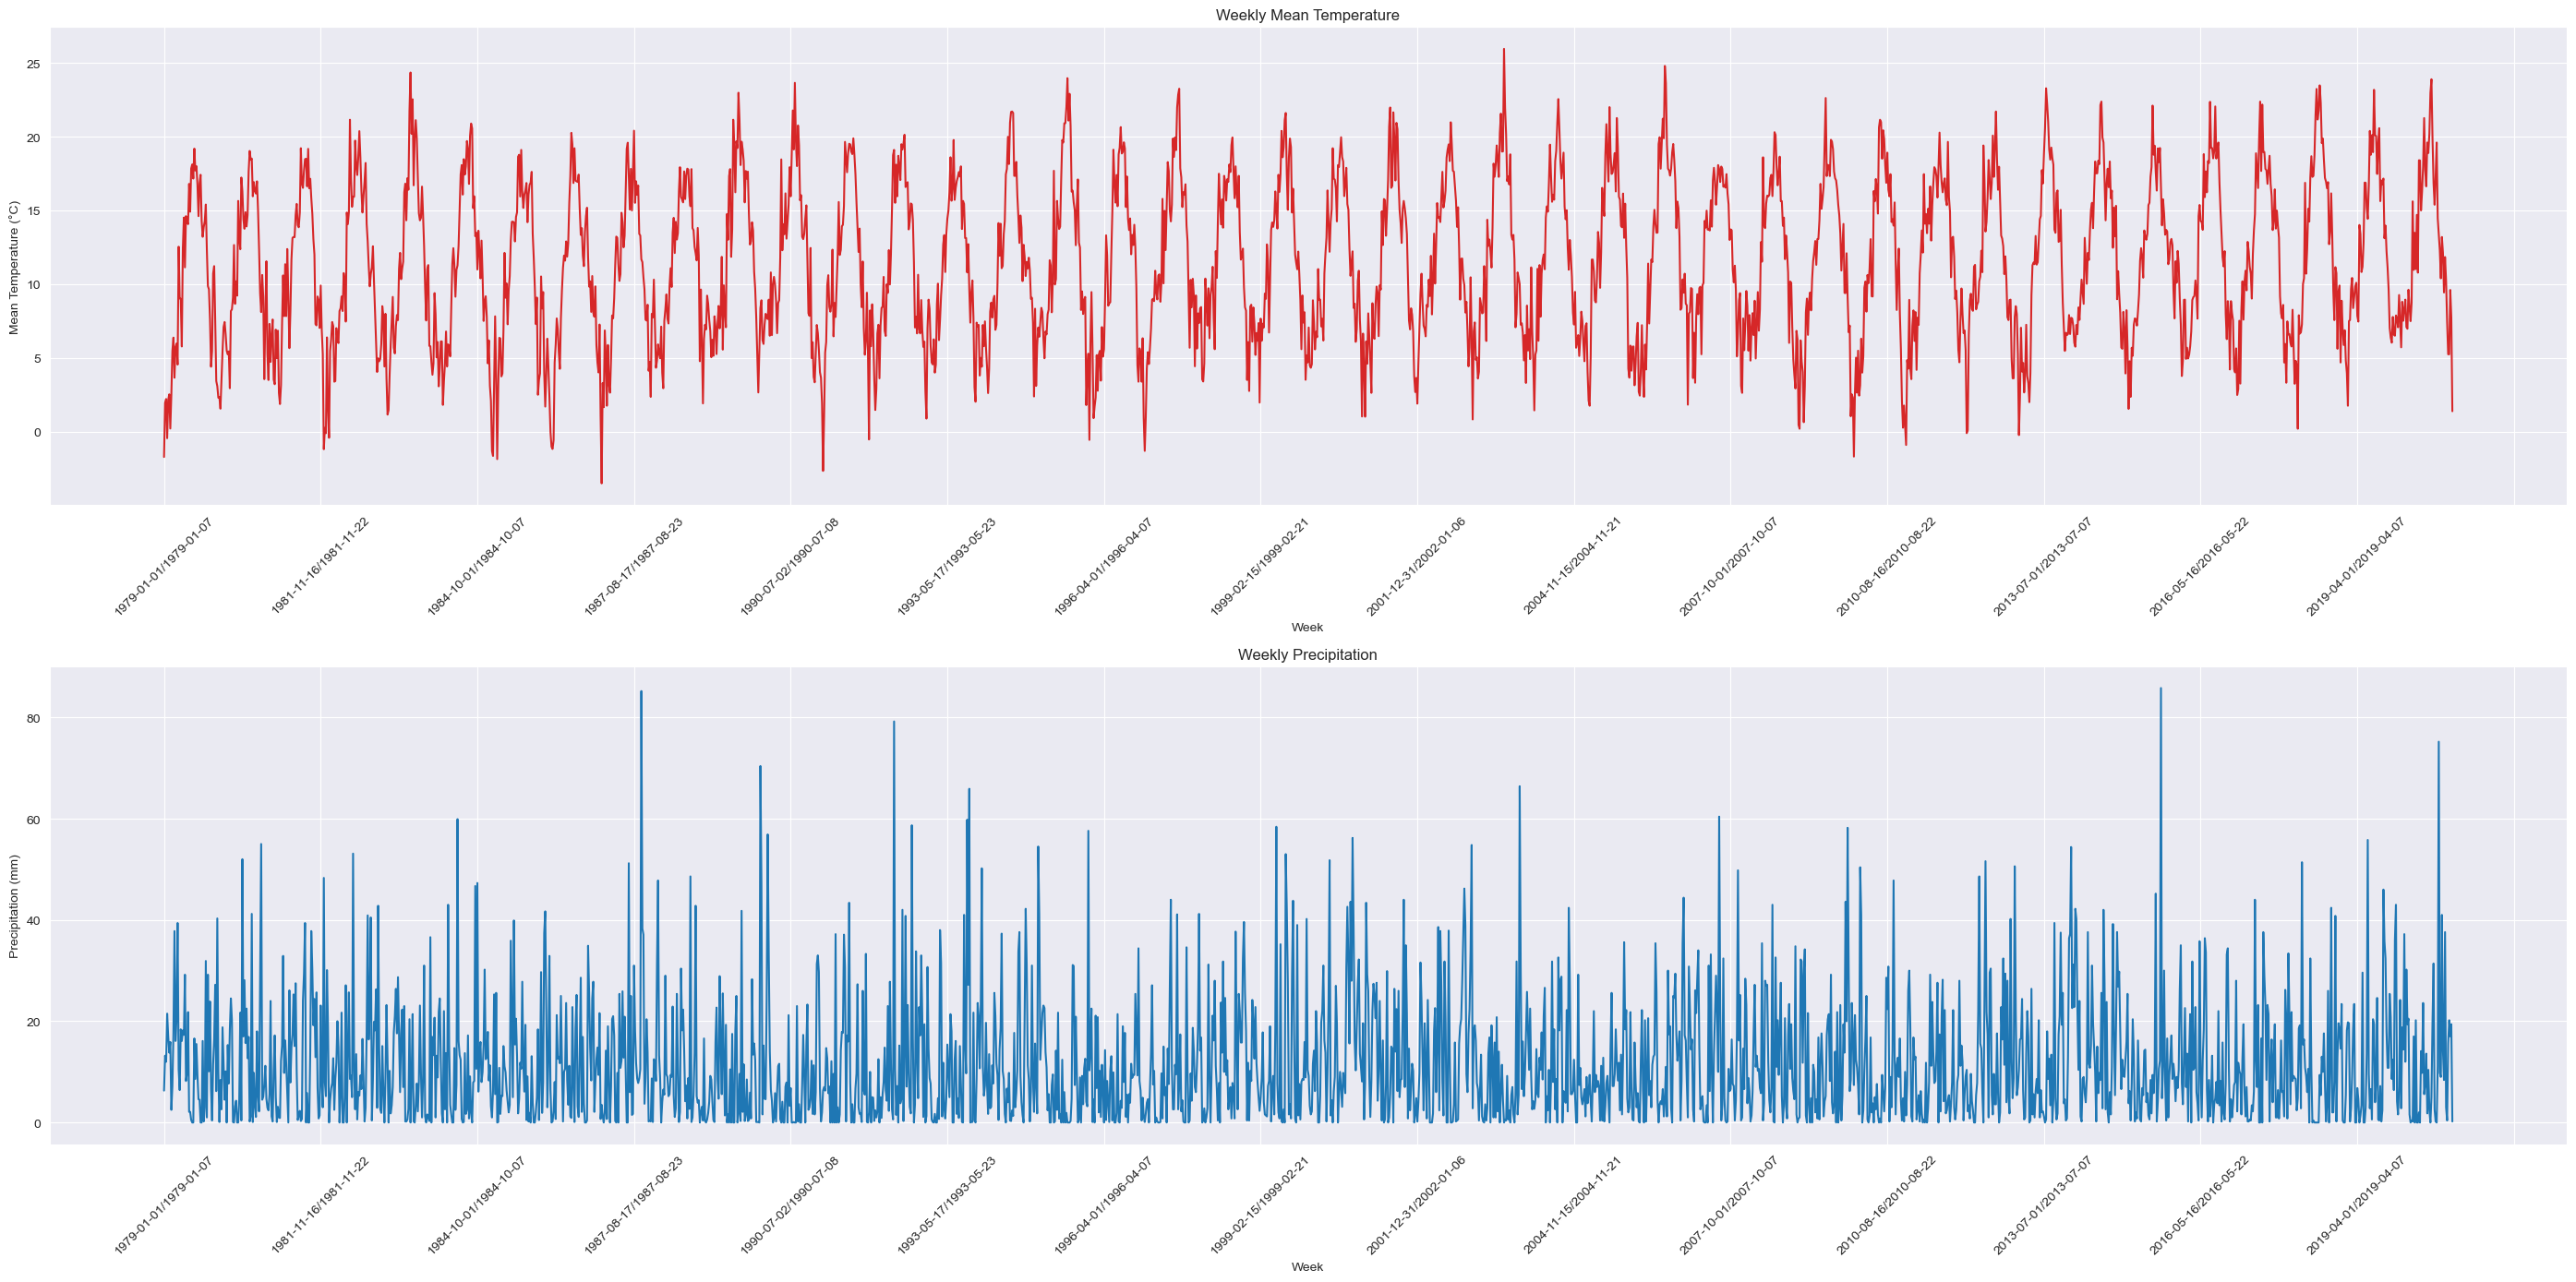

In [9]:
import matplotlib.pyplot as plt

# Create the figure containing two subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(28,14))

# The plot for mean_temp
ax1.plot(mean_temp_weekly.index.astype(str),mean_temp_weekly.values,label='Mean Temperature',color='tab:red')
ax1.set_xlabel('Week')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Weekly Mean Temperature')

# The plot for precipitation
ax2.plot(precipitation_weekly.index.astype(str),precipitation_weekly.values,label='Precipitation', color='tab:blue')
ax2.set_xlabel('Week')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Weekly Precipitation')

# Adjust x-axis label spacing
ax1.tick_params(axis='x',rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.tick_params(axis='x',rotation=45)
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))


# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

## Data visualization by week in two years

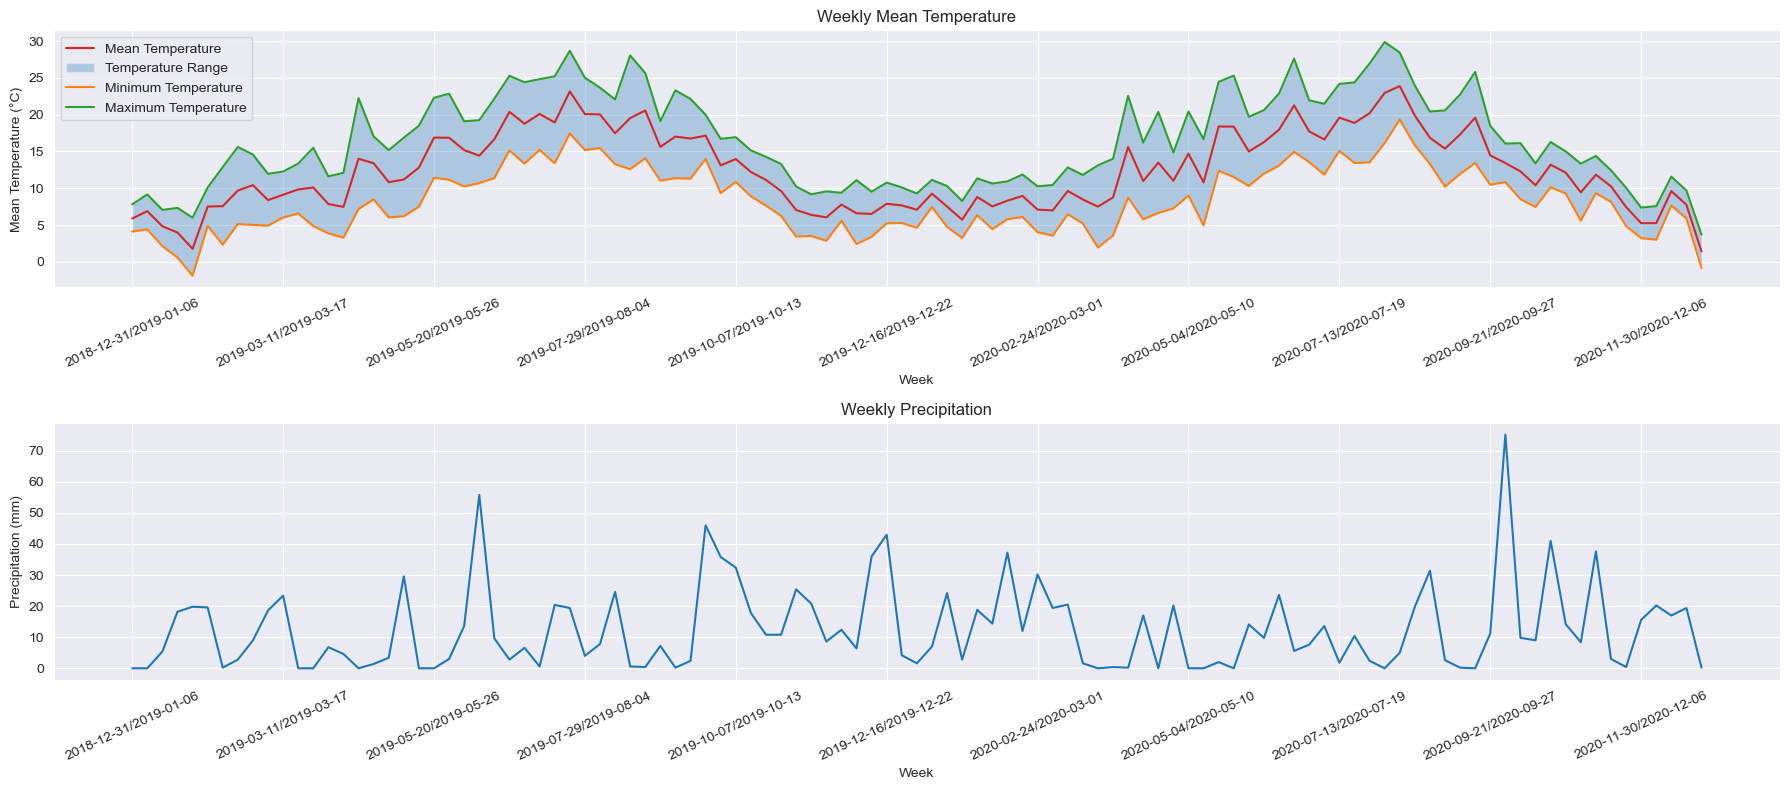

In [10]:
import matplotlib.pyplot as plt

# Create the figure containing two subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,8))

# The plot for mean_temp
ax1.plot(mean_temp_weekly_two.index.astype(str),mean_temp_weekly_two.values,label='Mean Temperature',color='tab:red')
ax1.fill_between(mean_temp_weekly_two.index.astype(str), min_temp_weekly_two.values, max_temp_weekly_two.values, alpha=0.3, label='Temperature Range')
ax1.plot(min_temp_weekly_two.index.astype(str), min_temp_weekly_two.values, label='Minimum Temperature', color='tab:orange')
ax1.plot(max_temp_weekly_two.index.astype(str), max_temp_weekly_two.values, label='Maximum Temperature', color='tab:green')
ax1.set_xlabel('Week')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Weekly Mean Temperature')
ax1.legend(loc='upper left')

# The plot for precipitation
ax2.plot(precipitation_weekly_two.index.astype(str),precipitation_weekly_two.values,label='Precipitation', color='tab:blue')
ax2.set_xlabel('Week')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Weekly Precipitation')

# Adjust x-axis label spacing
ax1.tick_params(axis='x',rotation=25)
ax1.xaxis.set_major_locator(plt.MaxNLocator(14))
ax2.tick_params(axis='x',rotation=25)
ax2.xaxis.set_major_locator(plt.MaxNLocator(14))


# Adjust the layout of the subplots
plt.tight_layout()
plt.show()